# SVM - Kernel Transforms

One of the condition in the Linear SVM is that the points should be linearly separable. However this is not always possible in classification problems

## Building Intution

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (6, 6)

In [7]:
from ipywidgets import interact

##  Non Linear Separable Points

Lets see an example of this in a two-dimensional space

In [8]:
np.random.seed(1234)

In [9]:
def plot_points(p):
    theta = np.random.uniform(0, 2*np.pi*2, p)
    raidus = np.array(np.random.randn(p)*2 + 25)
    circle = [[np.cos(t), np.sin(t)] for t in theta]
    x0 = raidus.reshape(p,1) * circle
    x1 = np.random.randn(p, 2)*4
    X = np.r_[x0,x1]
    y = [0] * p + [1] * p
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, s=40)
    #plt.xlim(-20,20)
    #plt.ylim(-20,20)
    plt.show()

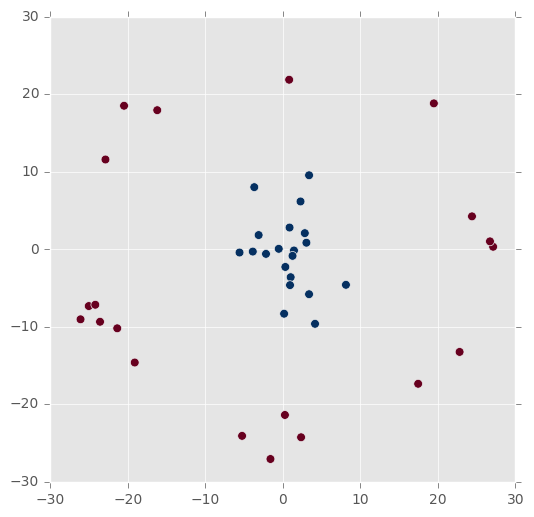

In [10]:
plot_points(20)

## Non-Linear Transformations

If the points are not linearly separable, then we can use some transformation to make them linear seperable. This is called Non-Linear Transformation.

Here we can use the square transformation to see the output

$$ z = x_1^2 + x_2^2 $$

In [11]:
def plot_points_transforms(p):
    theta = np.random.uniform(0, 2*np.pi*2, p)
    raidus = np.array(np.random.randn(p)*2 + 25)
    circle = [[np.cos(t), np.sin(t)] for t in theta]
    x0 = raidus.reshape(p,1) * circle
    x1 = np.random.randn(p, 2)*4
    X = np.r_[x0,x1]
    y = [0] * p + [1] * p
    z = np.square(X).sum(axis =1)
    
    #plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, s=40)
    plt.scatter(X[:, 0], z, c=y, cmap=plt.cm.RdBu, s=40)
    #plt.xlim(-20,20)
    #plt.ylim(-20,20)
    plt.show()

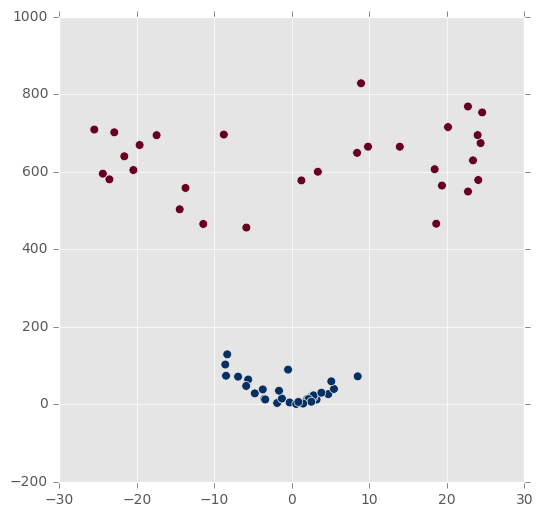

In [12]:
plot_points_transforms(30)

# Kernel Transformations

The kernel function allows us to do this without needing to do these transformation ourselves can be any of the following:
- linear: $\langle x, x'\rangle.$
- polynomial: $(\gamma \langle x, x'\rangle + r)^d$. d is specified by keyword degree, r by coef0.
- rbf: $\exp(-\gamma |x-x'|^2)$. $\gamma$ is specified by keyword gamma, must be greater than 0.
- sigmoid $(\tanh(\gamma \langle x,x'\rangle + r))$, where r is specified by coef0.

In [13]:
from sklearn import svm

In [16]:
def plot_kernels(p, k):
    theta = np.random.uniform(0, 2*np.pi*2, p)
    raidus = np.array(np.random.randn(p)*2 + 25)
    circle = [[np.cos(t), np.sin(t)] for t in theta]
    x0 = raidus.reshape(p,1) * circle
    x1 = np.random.randn(p, 2)*4
    X = np.r_[x0,x1]
    y = [0] * p + [1] * p
    
    print(k)
    lin_svc = svm.SVC(kernel='linear', C=1)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=1)
    poly_svc = svm.SVC(kernel='poly', degree=2, C=1)
    
    if k == "linear":
        clf = lin_svc
    elif k == "rbf":
        clf = rbf_svc
    else:
        clf = poly_svc
    
    clf.fit(X,y)
    clf.predict(X)
    
    
    # plot the boundaries
    x_min, x_max = -30, 30
    y_min, y_max = -30, 30
    step = 0.1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    xxyy = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(xxyy)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha = 0.5)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, s=40)
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.show()  

linear


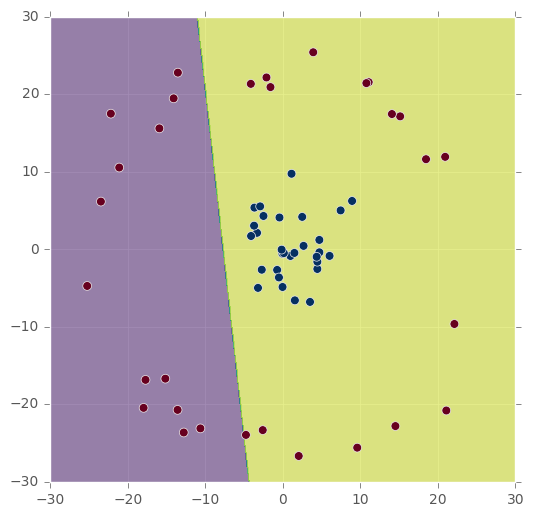

In [18]:
plot_kernels(30,"linear")

poly


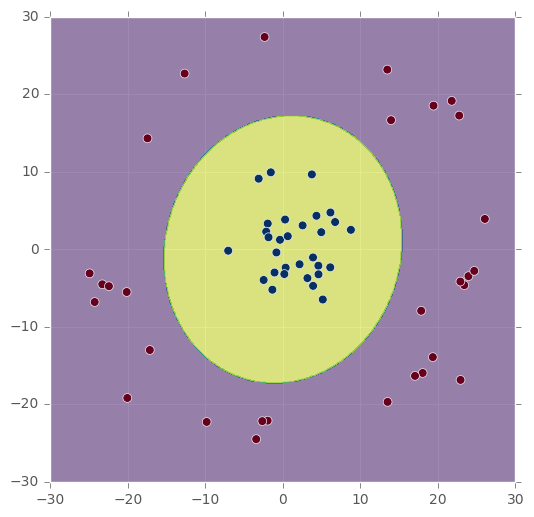

In [17]:
plot_kernels(30,"poly")

rbf


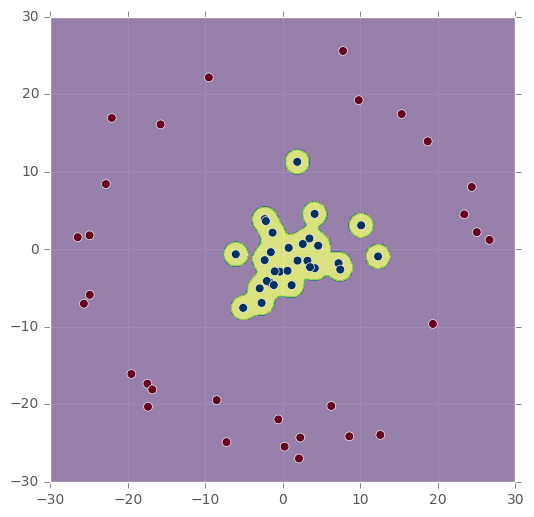

In [19]:
plot_kernels(30,"rbf")